# Notebook 2: Preprocessing and EDA

In this notebook, I will be examining my dataset gathered from the subreddit r/blackops4. Given that I am dealing with reddit data to predict patch updates for the actual videogame, I suspect that I will run into issures regarding sentiment analysis and actually finding signal in the noise of the data. 

To run sentiment analysis on my data, I will run VADER, which is a sentiment analyzer specialized on social media posts. It reads capitalization, punctuation, and emojis, so I will run VADER before cleaning my data and create a column for the sentiment score of each comment. I think for the most part, this will work well, but there will be issues when it comes to reading particular named items in the game, like, 'dead silence', for example. It will also run into issues when comments are of significant length. To combat the issue with specific items in the game eliciting negative sentiment, I will look into replacing instances of those words with a single proxy word. 

Later in the notebook, I will look at individual user data and see if there is some signal I can find in there. I will look at comment count, scores, sentiment, start and end dates, and duration of participation. 

In [1]:
import pandas as pd
import numpy as np
import json
import time
import re
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import datetime as dt

%matplotlib inline



Reading in my csv of all comments from the Blackops4 Subreddit since the day before the game was released. These comments go back to October 11, 2018.

In [2]:
df = pd.read_csv('../data/blackops_comments.csv')

In [3]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

Dropping any duplicates in the 'body' column. These are most likely spam, short comments, or advertisements. No need to look at them. 

In [4]:
df.drop_duplicates(subset = 'body', inplace = True)

In [5]:
df.shape

(1887120, 6)

Checking out the datatypes. 

In [6]:
df.dtypes

author         object
body           object
created_utc     int64
score           int64
permalink      object
date           object
dtype: object

Examining VADER sentiment analysis module to see how it works. 

In [7]:
analyser = SentimentIntensityAnalyzer()

In [8]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [9]:
df['body'].loc[0]

"So they're just gonna ignore the Sparrow bug?"

The sentiment function outputs a positive, neutral, negative, and compound score. I will be using the compound score on my data.

In [10]:
(sentiment_analyzer_scores(df['body'].loc[0]))

{'neg': 0.263, 'neu': 0.737, 'pos': 0.0, 'compound': -0.3612}

Examining effects of punctionation and emojis on sentiment_analyzer_scores

In [11]:
sentiment_analyzer_scores('i really like tea!')

{'neg': 0.0, 'neu': 0.393, 'pos': 0.607, 'compound': 0.474}

In [12]:
sentiment_analyzer_scores('i really like tea')

{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.4201}

In [13]:
sentiment_analyzer_scores('i like tea')

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}

In [14]:
sentiment_analyzer_scores('tea')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [15]:
sentiment_analyzer_scores(':)')

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4588}

In [16]:
sentiment_analyzer_scores(':)  !!!!!')

{'neg': 0.0, 'neu': 0.193, 'pos': 0.807, 'compound': 0.6331}

Creating a compound column. 

In [17]:
df['compound'] = 0

Making sure I can key into the dictionary output of the sentiment function.

In [18]:
sentiment_analyzer_scores(df['body'].iloc[0])['neg']

0.263

In [19]:
perk_list = ['dead silence', 'mobility', 
             'skulker', 'medic', 
             'iron lungs', 'brawler', 
             'awareness', 'paranoia', 
             'squad link', 'consumer', 
             'outlander', 'looter',
             'awareness', 'reinforced']

Applying my sentiment function to every item in body and assigning the value to the compound column.

In [20]:
# for i in perk_list:
#     df['body'].re(i, 'perk', inplace = True)

# Warning This cell takes 10-15 minutes to run.

The cell below takes the compound sentiment score of each cell and adds it to a column called 'compound'. I will be using this later to look at distribution of sentiment, and I will be averaging the sentiment per day to look at overall sentiment between patches. 

In [21]:
df['compound'] = df['body'].apply(lambda x: sentiment_analyzer_scores(str(x))['compound'])

## Cleaning Dataset and Examining Trends

In [22]:
df.head()

,author,body,created_utc,score,permalink,date,compound
0,Pikachu-Faroo,So they're just gonna ignore the Sparrow bug?,1556754911,1,/r/Blackops4/comments/bjn8sm/may_1st_update_ga...,2019-05-01,-0.3612
1,Only-One-Gender,Yeah I'm getting them,1556754886,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,2019-05-01,0.2960
2,twopumpstump,So you are getting the new stuff? I heard the ...,1556754860,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,2019-05-01,0.4215
3,MoneyMajesty,Was just about to say this. The sad thing abou...,1556754825,1,/r/Blackops4/comments/bjnygs/if_only_treyarcha...,2019-05-01,-0.4767
4,Slaya420D,*claims the game is dead*\n\nI can find a lobb...,1556754821,1,/r/Blackops4/comments/bjo9k6/seriously_this_ga...,2019-05-01,0.0258


Finding the comment with the highest compound score. 

In [23]:
df['compound'].idxmax()

992504

Examining the comment with the highest compound score. 

In [24]:
df.loc[df['compound'].idxmax()]['body']

'Play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play

Checking out unique authors. 

In [25]:
df['author'].nunique()

148053

The below shows the average comment count per user. Many people only comment once, and there are some people who participate for as long as they play the game. It is typical of any internet forum 

In [26]:
len(df)/df['author'].nunique()

12.746246276671192

In [27]:
df.index = range(len(df))

Examining top score. 

In [28]:
df.loc[df.score.idxmax()]['body']

"We greatly appreciate videos that can help us identify bugs or issues of any kind, and in particular hit detection issues. These are a top priority for us to isolate and fix, and as you can imagine they are tough to track down given everyone's different network conditions. And of course, there is also the slight chance of misconception of what happened, which can usually be explained if we slow things down enough. But the video will always prove useful, as they can and have helped us identify and fix bugs.\n\nWe can't go through every one of these from every Player, but you asked for an explanation, and a ton of other Players upvoted and commented. That tells us this is an important issue for you all, so an explanation you shall have!\n\nIn this case, we had to cap the embedded video and slow it to a crawl to discover what happened. 12 Shots were fired, which anyone watching can easily see in the ammo counter. We scrubbed this frame by frame from beginning to end, thinking you would b

Examining lowest score.

In [29]:
df.loc[df.score.idxmin()]['body']

"I pre ordered for the beta code. When I asked how much I have to put down, they said 0, so I paid 0 and took the beta code. Now they are calling me to pick up the game. I didn't like the futuristic game play of the beta. 90 cad is a lot for a game I didn't ask for"

Examining structure of permalink so I can turn the title into its own column.

In [30]:
df.permalink.loc[1]

'/r/Blackops4/comments/bjnzy5/this_is_so_damn_satisying/em9spes/'

Finding the parameters of the title within the permalink so I can look at sentiment surrounding different posts. 

In [31]:
len('/r/Blackops4/comments/bjnzy5/')#this_is_so_damn_satisying/em9spes/

29

In [32]:
len('/em9spes/')

9

Setting a title column using a lambda function that takes advantage of the parameters I found above. 

In [33]:
df['title'] = df.permalink.apply(lambda x: x[29:-9])

In [34]:
df.head()

,author,body,created_utc,score,permalink,date,compound,title
0,Pikachu-Faroo,So they're just gonna ignore the Sparrow bug?,1556754911,1,/r/Blackops4/comments/bjn8sm/may_1st_update_ga...,2019-05-01,-0.3612,may_1st_update_gameplay_improvements_bug_fixes
1,Only-One-Gender,Yeah I'm getting them,1556754886,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,2019-05-01,0.2960,this_is_so_damn_satisying
2,twopumpstump,So you are getting the new stuff? I heard the ...,1556754860,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,2019-05-01,0.4215,this_is_so_damn_satisying
3,MoneyMajesty,Was just about to say this. The sad thing abou...,1556754825,1,/r/Blackops4/comments/bjnygs/if_only_treyarcha...,2019-05-01,-0.4767,if_only_treyarchacti_would_follow_suit_but_i
4,Slaya420D,*claims the game is dead*\n\nI can find a lobb...,1556754821,1,/r/Blackops4/comments/bjo9k6/seriously_this_ga...,2019-05-01,0.0258,seriously_this_game_is_dead


Creating a character count column.

In [35]:
df['character_count'] = df['body'].str.len()

In [36]:
df.head()

,author,body,created_utc,score,permalink,date,compound,title,character_count
0,Pikachu-Faroo,So they're just gonna ignore the Sparrow bug?,1556754911,1,/r/Blackops4/comments/bjn8sm/may_1st_update_ga...,2019-05-01,-0.3612,may_1st_update_gameplay_improvements_bug_fixes,45.0
1,Only-One-Gender,Yeah I'm getting them,1556754886,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,2019-05-01,0.2960,this_is_so_damn_satisying,21.0
2,twopumpstump,So you are getting the new stuff? I heard the ...,1556754860,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,2019-05-01,0.4215,this_is_so_damn_satisying,106.0
3,MoneyMajesty,Was just about to say this. The sad thing abou...,1556754825,1,/r/Blackops4/comments/bjnygs/if_only_treyarcha...,2019-05-01,-0.4767,if_only_treyarchacti_would_follow_suit_but_i,82.0
4,Slaya420D,*claims the game is dead*\n\nI can find a lobb...,1556754821,1,/r/Blackops4/comments/bjo9k6/seriously_this_ga...,2019-05-01,0.0258,seriously_this_game_is_dead,69.0


Creating a word count column.

In [37]:
df['word_count'] = df['body'].map(lambda x: len(str(x).split()))

In [38]:
df.head()

,author,body,created_utc,score,permalink,date,compound,title,character_count,word_count
0,Pikachu-Faroo,So they're just gonna ignore the Sparrow bug?,1556754911,1,/r/Blackops4/comments/bjn8sm/may_1st_update_ga...,2019-05-01,-0.3612,may_1st_update_gameplay_improvements_bug_fixes,45.0,8
1,Only-One-Gender,Yeah I'm getting them,1556754886,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,2019-05-01,0.2960,this_is_so_damn_satisying,21.0,4
2,twopumpstump,So you are getting the new stuff? I heard the ...,1556754860,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,2019-05-01,0.4215,this_is_so_damn_satisying,106.0,22
3,MoneyMajesty,Was just about to say this. The sad thing abou...,1556754825,1,/r/Blackops4/comments/bjnygs/if_only_treyarcha...,2019-05-01,-0.4767,if_only_treyarchacti_would_follow_suit_but_i,82.0,18
4,Slaya420D,*claims the game is dead*\n\nI can find a lobb...,1556754821,1,/r/Blackops4/comments/bjo9k6/seriously_this_ga...,2019-05-01,0.0258,seriously_this_game_is_dead,69.0,15


In [39]:
df.character_count.mean()

137.51235083744055

Examining the cell with the most characters

In [40]:
df.character_count.idxmax()

1067694

In [41]:
df.body.loc[df.character_count.idxmax()]

'Infinite Warfare &gt; Treyarch &gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;

I am deleting this comment as it is spam. 

In [42]:
df.drop(df.character_count.idxmax(), axis = 0, inplace = True)

In [43]:
df.character_count.idxmax()

1392351

In [44]:
df.body.loc[df.character_count.idxmax()]

"I'll try to give /u/TreyarchPC some helpful feedback here from my POV as someone who plays this game on PC everyday.\n\nThe first issue alot of people have here is the reposting of the console patch notes instead of issuing a specific PC related set of notes. If the reason for this is that the patch itself is identical then this makes sense, however it does not fix the core issue. \n\nAs you guys know the PC and Console meta games are widly different when it comes to the positioning of each gun in players personal rankings in terms of balance, knowing this and assuming that this PC patch is identical to the console patch excluding some PC bug fixes, wouldn't it be better to simply wait until you had a PC specific balance patch to roll out before doing any balancing on PC instead of forcing a patch onto the platform which works somewhat in opposite to the meta on that platform? As it stands alot of PC players myself to a lesser extent included are furstrated that this patch was pushed 

In [45]:
df.character_count.idxmin()

952

In [46]:
df['body'].loc[952]

'W'

I am going to drop all rows with a character count of less than 10.

In [47]:
df = df[df['character_count'] > 10]

In [48]:
df.shape

(1848889, 10)

Plotting a histogram of character count values.

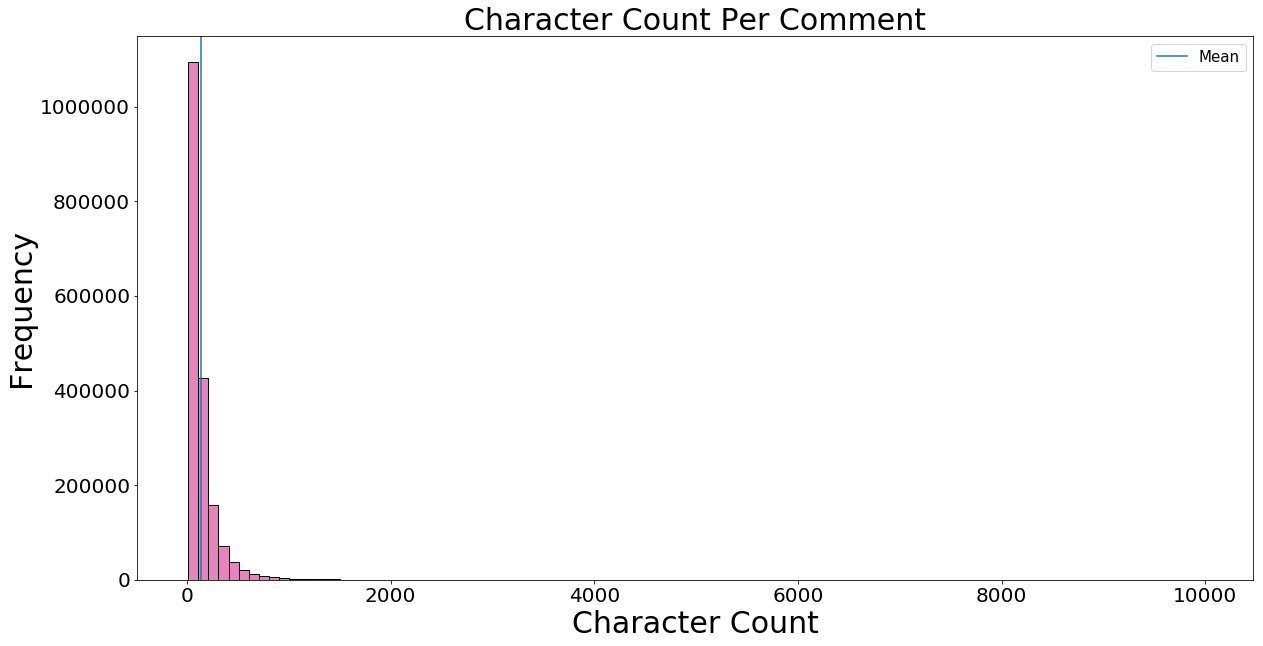

In [49]:
plt.figure(figsize=(20,10))
plt.hist(df['character_count'], 
         bins=100, 
         color=['#E983BD'], 
         ec='k')
plt.ylabel('Frequency', fontsize = 30)
plt.xlabel('Character Count', fontsize = 30)
plt.axvline(df['character_count'].mean(), color = 'C0')
plt.title('Character Count Per Comment', fontsize=30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(['Mean'], fontsize = 15)

The distribution of character counts is skewed to the right very significantly. It's clear that most of the comments sit between 0 and 200 characters, with some strong outliers sitting around 10k. 

Plotting the distribution of word counts per comment.

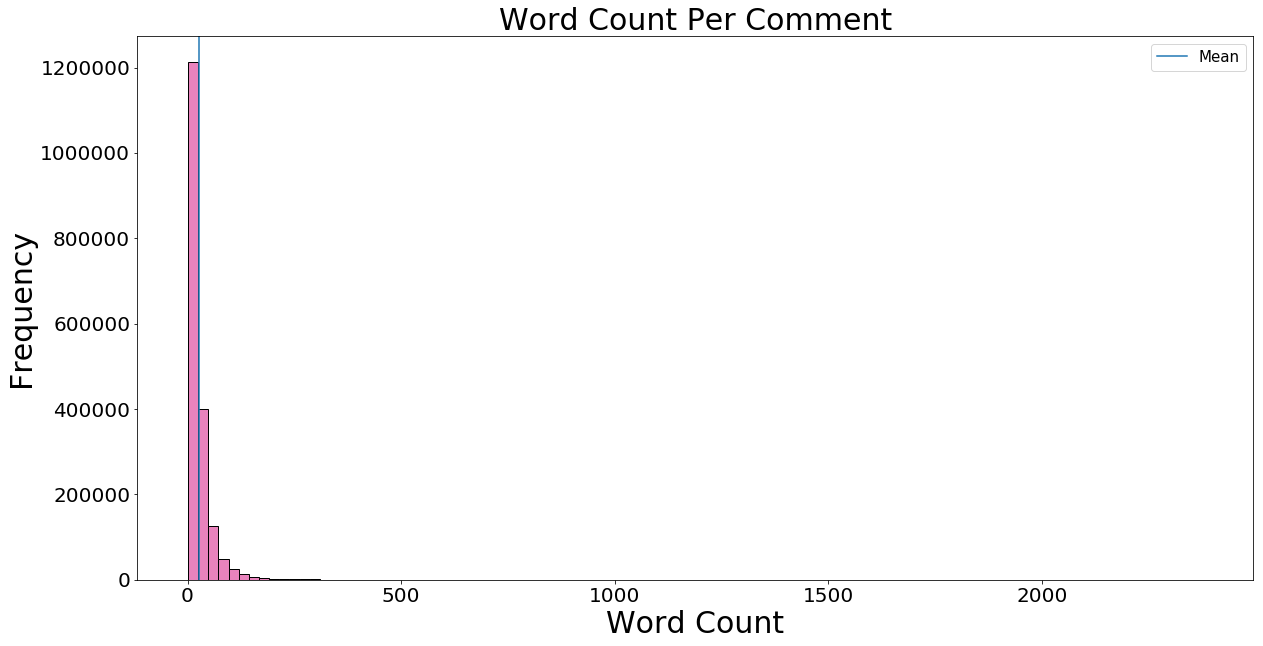

In [50]:
plt.figure(figsize=(20,10))
plt.hist(df['word_count'], 
         bins=100, 
         color=['#E983BD'], 
         ec='k')
plt.ylabel('Frequency', fontsize = 30)
plt.xlabel('Word Count', fontsize = 30)
plt.axvline(df['word_count'].mean(), color = 'C0')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Word Count Per Comment', fontsize=30)
plt.legend(['Mean'], fontsize = 15)

Similar to the character count. The word count is extremely skewed to the right due to some very wordy comments. 

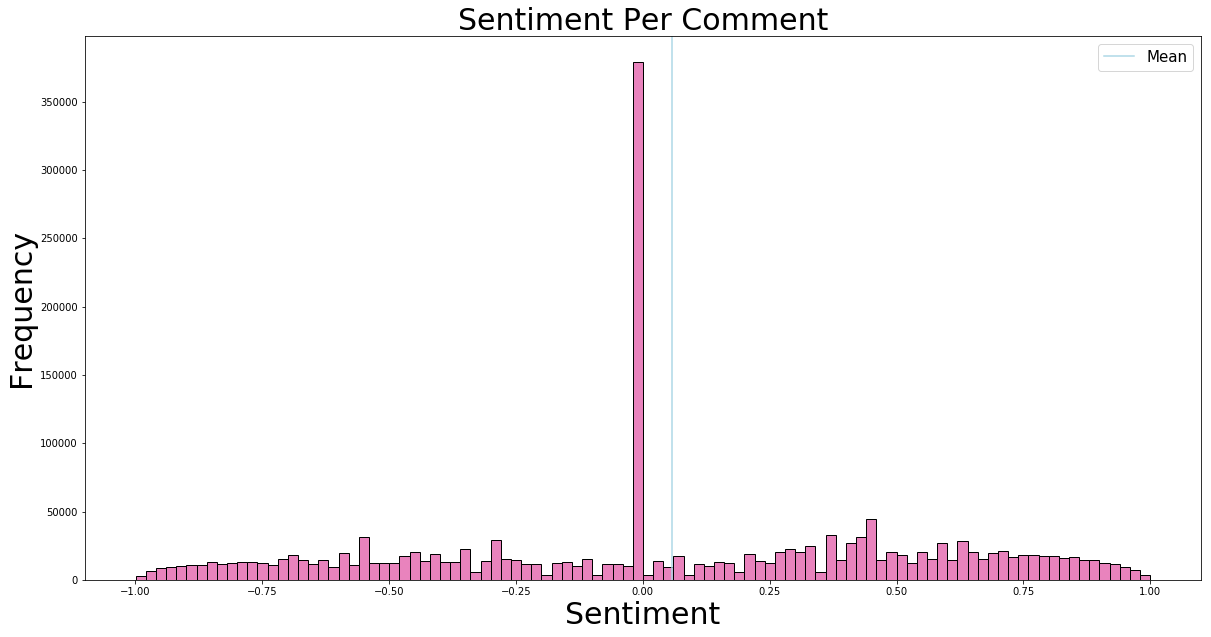

In [51]:
plt.figure(figsize=(20,10))
plt.hist(df['compound'], 
         bins=100, 
         color=['#E983BD'], 
         ec='k')
plt.ylabel('Frequency', fontsize = 30)
plt.xlabel('Sentiment', fontsize = 30)
plt.axvline(df['compound'].mean(), color = 'lightblue')
plt.title('Sentiment Per Comment', fontsize=30)
plt.legend(['Mean'], fontsize = 15)
plt.savefig('../plots/sentiment_distribution')

Lowercasing all characters in the body column since I already ran vader. 

In [52]:
df.body = df.body.str.lower()

In [53]:
df.head()

,author,body,created_utc,score,permalink,date,compound,title,character_count,word_count
0,Pikachu-Faroo,so they're just gonna ignore the sparrow bug?,1556754911,1,/r/Blackops4/comments/bjn8sm/may_1st_update_ga...,2019-05-01,-0.3612,may_1st_update_gameplay_improvements_bug_fixes,45.0,8
1,Only-One-Gender,yeah i'm getting them,1556754886,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,2019-05-01,0.2960,this_is_so_damn_satisying,21.0,4
2,twopumpstump,so you are getting the new stuff? i heard the ...,1556754860,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,2019-05-01,0.4215,this_is_so_damn_satisying,106.0,22
3,MoneyMajesty,was just about to say this. the sad thing abou...,1556754825,1,/r/Blackops4/comments/bjnygs/if_only_treyarcha...,2019-05-01,-0.4767,if_only_treyarchacti_would_follow_suit_but_i,82.0,18
4,Slaya420D,*claims the game is dead*\n\ni can find a lobb...,1556754821,1,/r/Blackops4/comments/bjo9k6/seriously_this_ga...,2019-05-01,0.0258,seriously_this_game_is_dead,69.0,15


A function that uses regex to remove new line characters, subreddits, and other non essential characters. I tried using the regex code in a simple 'apply' statement but that wasn't working. Steve Yi helped me out with this one.

In [54]:
def regex_func(x):
    variable = (re.sub(r"(http\S+)|(\/u\/\S+)|(r\/\S+)|(\\n\S+)|(\^\S+)|(\&amp\S+)|(nbsp\S+)|[^a-zA-Z ]|(aaa\S+)", 
                                               " ", 
                                               x))
    return variable

In [55]:
df['body'] = df['body'].apply(regex_func)

Making sure the regex function worked. 

In [56]:
df['body'].loc[1078259]

'look how mindfucked you are lmao you re doing every single thing i want you to do    years on reddit like a nerd and you let a sock account troll the fuck out of you'

In [57]:
df.shape

(1848889, 10)

Resetting the index to the length of the dataframe.

In [58]:
df.index = range(len(df))

In [59]:
# df = pd.read_csv('../data/bo_four_wc_cc_sentiment_regex.csv')

In [60]:
# df.drop('Unnamed: 0.1', axis = 1, inplace = True)

In [61]:
# df.drop('Unnamed: 0', axis = 1, inplace = True)

Creating an interaction column between the reddit score and the compound score. I believe that this will produce more signal than just the compound score on it's own. In a sense, it will magnify popular opinion, positive or negative, by multiplying the sentiment by the reddit score.

In [62]:
df['interaction_score_compound'] = df['score'] * df['compound']

Dropping any comment with less than three words, a reddit score of zero, or a compound score of zero, as absolute neutrality may inhibit my eda and modeling. 

In [63]:
df = df.drop(df[df['word_count'] < 3].index)

In [64]:
df = df.drop(df[df['score'] == 0].index)

In [65]:
df = df.drop(df[df['compound'] == 0].index)

In [66]:
df.shape

(1425734, 11)

Creating a column that assigns a count of 1 to each row for later analysis. 

In [67]:
df['count_comments'] = 1

In [68]:
df.dtypes

author                         object
body                           object
created_utc                     int64
score                           int64
permalink                      object
date                           object
compound                      float64
title                          object
character_count               float64
word_count                      int64
interaction_score_compound    float64
count_comments                  int64
dtype: object

Creating a 'patch update' column in which I am assigning the date of the row. From there I will map out each patch date to 1 and every other day to zero. The patch days will be my target column, and will likely be very unbalanced, as there have been only 18 full patches since the games release. 

In [69]:
df['patch_update'] = df['date']

In [70]:
df.loc[5]['date']

'2019-05-01'

Mapping out all of the days when patches came out to 1, and will map the rest of the days to zero, so I can run a classification model to determine when patches will come out. 

In [71]:
df['patch_update'] = df['patch_update'].map({'2018-10-19': 1, '2018-10-31': 1, 
                                             '2018-11-13': 1, '2018-11-20': 1, 
                                             '2018-12-03': 1, '2018-12-10': 1, 
                                             '2018-12-18': 1, '2019-01-15': 1, 
                                             '2019-01-29': 1, '2019-02-19': 1,
                                             '2019-03-12': 1, '2019-03-18': 1,
                                             '2019-03-26': 1, '2019-04-01': 1,
                                             '2019-04-09': 1, '2019-04-17': 1,
                                             '2019-04-23': 1, '2019-04-30': 1})

Filling the null values with 0s. 

In [72]:
df['patch_update'].fillna(0, inplace = True)

Checking to see the distribution of 0 class and target class. 

In [73]:
df['patch_update'].value_counts(normalize = True)

0.0    0.895576
1.0    0.104424
Name: patch_update, dtype: float64

As we can see above, the distribution is pretty unbalanced, with my target class making up around 10% of the dataset.

Don't need the update column. 

In [74]:
df.dtypes

author                         object
body                           object
created_utc                     int64
score                           int64
permalink                      object
date                           object
compound                      float64
title                          object
character_count               float64
word_count                      int64
interaction_score_compound    float64
count_comments                  int64
patch_update                  float64
dtype: object

Converting my date column to datetime. 

In [75]:
df['date'] = pd.to_datetime(df['date'])

Examning the number of unique users on the most active and least active days. 

In [76]:
df.groupby('date')['author'].nunique().min()

619

In [77]:
df.groupby('date')['author'].nunique().max()

9429

In [78]:
# plt.figure(figsize = (20,10))
# plt.title('Comments and Sentiment Per Day', fontsize = (30))
# plt.ylabel('Comments', fontsize = 25)
# plt.xlabel('Date', fontsize = 25)
# plt.plot(df.groupby([df.date, 'count_comments']).size().unstack('count_comments')[1],  color = 'C0')
# plt.plot(df.groupby(df.date)['interaction'].sum(), c = 'C1')
# plt.plot(df.groupby('date')['author'].nunique(), c ='green')
# plt.axvline(dt.datetime(2018, 10, 18), c = '#E983BD')
# plt.axvline(dt.datetime(2018, 10, 31), c = '#E983BD')
# plt.axvline(dt.datetime(2018, 11, 13), c = '#E983BD')
# plt.axvline(dt.datetime(2018, 11, 20), c = '#E983BD')
# plt.axvline(dt.datetime(2018, 12, 3), c = '#E983BD')
# plt.axvline(dt.datetime(2018, 12, 18), c = '#E983BD')
# plt.axvline(dt.datetime(2019, 1, 15), c = '#E983BD')
# plt.axvline(dt.datetime(2019, 1, 29), c = '#E983BD')
# plt.axvline(dt.datetime(2019, 2, 19), c = '#E983BD')
# plt.axvline(dt.datetime(2019, 3, 12), c = '#E983BD')
# plt.axvline(dt.datetime(2019, 3, 18), c = '#E983BD')
# plt.axvline(dt.datetime(2019, 3, 26), c = '#E983BD')
# plt.axvline(dt.datetime(2019, 4, 30), c = '#E983BD')
# plt.xticks(fontsize = 20)
# plt.legend(['Comment Count', 'Sentiment Sum', 'Unique Commenters', 'Patch Day'], fontsize = 20, loc = 'upper right');

Pushing to csv. 

In [79]:
df.to_csv('../data/df_bo.csv', index = False)

In [80]:
df.head()

,author,body,created_utc,score,permalink,date,compound,title,character_count,word_count,interaction_score_compound,count_comments,patch_update
0,Pikachu-Faroo,so they re just gonna ignore the sparrow bug,1556754911,1,/r/Blackops4/comments/bjn8sm/may_1st_update_ga...,2019-05-01,-0.3612,may_1st_update_gameplay_improvements_bug_fixes,45.0,8,-0.3612,1,0.0
1,Only-One-Gender,yeah i m getting them,1556754886,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,2019-05-01,0.2960,this_is_so_damn_satisying,21.0,4,0.2960,1,0.0
2,twopumpstump,so you are getting the new stuff i heard the ...,1556754860,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,2019-05-01,0.4215,this_is_so_damn_satisying,106.0,22,0.4215,1,0.0
3,MoneyMajesty,was just about to say this the sad thing abou...,1556754825,1,/r/Blackops4/comments/bjnygs/if_only_treyarcha...,2019-05-01,-0.4767,if_only_treyarchacti_would_follow_suit_but_i,82.0,18,-0.4767,1,0.0
4,Slaya420D,claims the game is dead i can find a lobby ...,1556754821,1,/r/Blackops4/comments/bjo9k6/seriously_this_ga...,2019-05-01,0.0258,seriously_this_game_is_dead,69.0,15,0.0258,1,0.0


## User Analysis

Creating a new dataframe with the users as the index with their mean comments, scores, sentiments, start date, end date, and duration. Will look into a regression model to predict how long a user will stay active based on commentary and sentiment scores. 

In [81]:
df_users = pd.DataFrame(df.groupby('author')['count_comments'].count())

In [82]:
df_users.head()

,count_comments
author,
-------_---,2
----_,3
---Alexander---,107
---KC---,1
---Kaiser,5


Running a bunch of group by functions from my original df to create columns in my users df.

I am adding a mean compound score by user. I will also be adding a sum of the compound scores per user.

In [83]:
df_users['compound_mean'] = df.groupby('author')['compound'].mean()

In [84]:
df_users['compound_sum'] = df.groupby('author')['compound'].sum()

Adding a mean reddit score by user. Also adding a sum score.

In [85]:
df_users['mean_score'] = df.groupby('author')['score'].mean()

In [86]:
df_users['sum_score'] = df.groupby('author')['score'].sum()

Adding a mean interaction score by user.. Since this is a combination of the two features above, I will be leaving it as just a mean column and won't be adding a sum column.

In [87]:
df_users['mean_interaction'] = df.groupby('author')['interaction_score_compound'].mean()

Adding a start date and an end date column so see user dropoff.

In [88]:
df_users['start_date'] = df.groupby('author')['date'].min()

In [89]:
df_users['end_date'] = df.groupby('author')['date'].max()

This is just an interaction column between the two above to see how long a user stayed active on the subreddit.

In [90]:
df_users['duration'] =  df_users['end_date'] - df_users['start_date'] 

Adding mean word count and mean character count as additional features per user. Some users might stick to 10-20 characters per comment, while others may average significantly more than that. 

In [91]:
df_users['mean_word_count'] = df.groupby('author')['word_count'].mean()

In [92]:
df_users['mean_char_count'] = df.groupby('author')['character_count'].mean()

In [93]:
df_users.mean_score.max()

1520.4285714285713

Making sure the dtypes are correct. Might look more into this dataframe later. 

In [94]:
df_users.dtypes

count_comments                int64
compound_mean               float64
compound_sum                float64
mean_score                  float64
sum_score                     int64
mean_interaction            float64
start_date           datetime64[ns]
end_date             datetime64[ns]
duration            timedelta64[ns]
mean_word_count             float64
mean_char_count             float64
dtype: object

Looking into the users with the most comments. Might run a regression model to predict user duration based on comments and sentiment. 

In [95]:
df_users.sort_values(by = 'count_comments', ascending = False).head()

,count_comments,compound_mean,compound_sum,mean_score,sum_score,mean_interaction,start_date,end_date,duration,mean_word_count,mean_char_count
author,,,,,,,,,,,
Thorneto,4714,0.191085,900.7750,1.816292,8562,0.343858,2018-10-12,2019-05-01,201 days,33.917480,174.259652
Im_Tsuikyit,3785,-0.088090,-333.4218,4.330779,16392,1.082118,2018-10-12,2019-05-01,201 days,20.200528,109.630383
dmania1611611,3626,0.059513,215.7943,1.240485,4498,0.183884,2018-10-11,2019-02-26,138 days,22.464975,123.423331
Mega_Millions,3391,0.093832,318.1851,1.374226,4660,0.162458,2018-10-13,2019-05-01,200 days,50.451784,262.830434
Slaya420D,2819,0.069901,197.0501,4.164243,11739,0.372367,2018-10-11,2019-05-01,202 days,13.642781,70.446612


In [96]:
df_users.shape

(128691, 11)

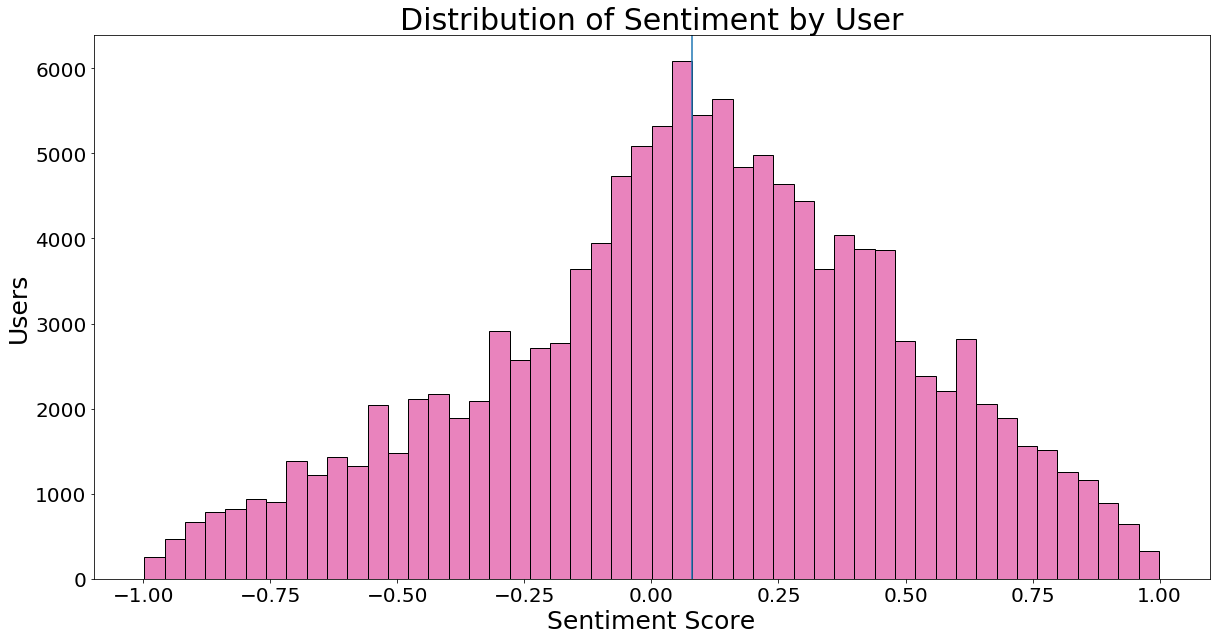

In [97]:
plt.figure(figsize = (20,10))
plt.title('Distribution of Sentiment by User', fontsize = 30)
plt.hist(df_users['compound_mean'], bins = 50, color = '#E983BD', ec = 'k')
plt.axvline(df_users['compound_mean'].mean(), color = 'C0')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Sentiment Score', fontsize = 25)
plt.ylabel('Users', fontsize = 25);

Above we can see the distribution of sentiment among each user. By far, the majority of the users average sentiment sits between -.25 and .5, with some users' averages sitting at each endpoint -1 and 1. 

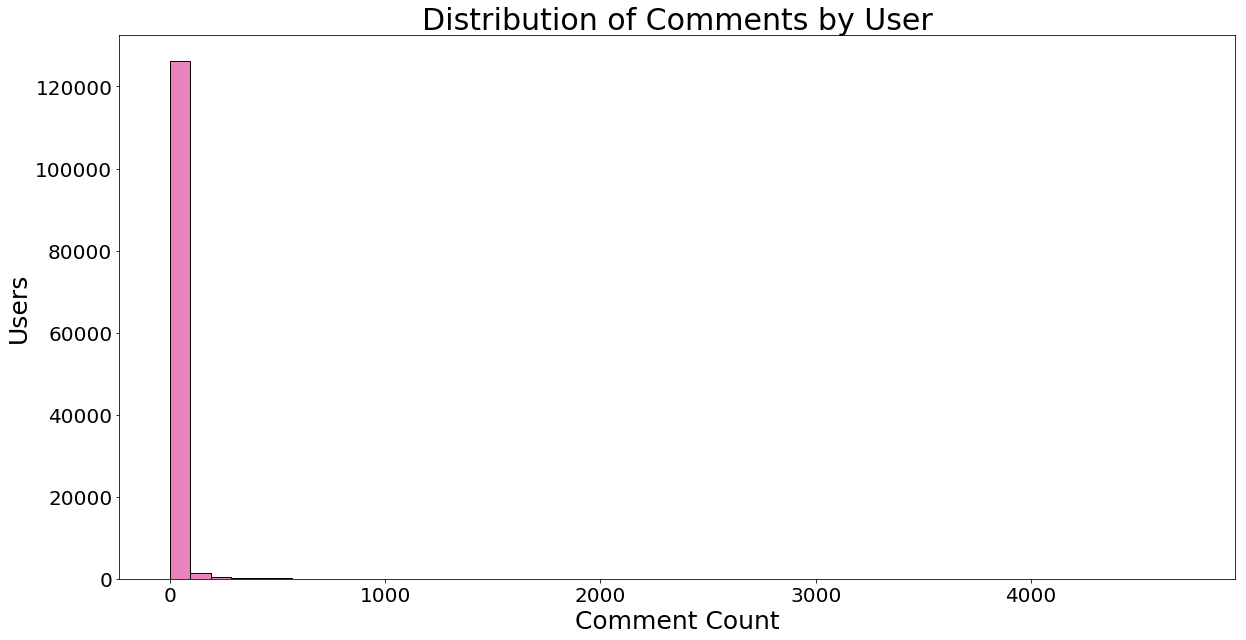

In [98]:
plt.figure(figsize = (20,10))
plt.title('Distribution of Comments by User', fontsize = 30)
plt.hist(df_users['count_comments'], bins = 50, color = '#E983BD', ec = 'k')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Comment Count', fontsize = 25)
plt.ylabel('Users', fontsize = 25);

I was mostly expecting a graph like this. The majority of users don't post at all, and the majority of those who do post, don't post extensively, which is why almost all of the users sit at between 0 and 100 comments, with a few outliers who have commented thousands of times. 

In [99]:
df_users.to_csv('../data/df_users.csv')

Creating some masks using common things people have complained about to see how it affects the dataframe.

In [100]:
# df_weapon_complaints = df[(df.body.str.contains('op') | df.body.str.contains('overpower') | df.body.str.contains('overpowered') | df.body.str.contains('nerf') | df.body.str.contains('nerfed')) & 
#    (df.body.str.contains('concussion') | df.body.str.contains('ninebang') | df.body.str.contains('cluster') | df.body.str.contains('gun') |df.body.str.contains('snipe') | df.body.str.contains('abr') |
#     df.body.str.contains('special') | df.body.str.contains('gren') | df.body.str.contains('ar') | df.body.str.contains('rifle') | df.body.str.contains('auto') | df.body.str.contains('perk') | 
#     df.body.str.contains('sdm') | df.body.str.contains('outlaw') | df.body.str.contains('spitfire'))]

In [101]:
# len(df_weapon_complaints)

This may be a bit too small of a dataset to examine for these purposes. I will examine some more options. 

## 'Overpowered' Key Word Analysis
Below I will be examining trends in sentiment using keywords that I self selected from having played the game. I am creating the dataframe now, but will be using it later in the notebook. 

Creating another dataframe that only contains comments with words that are associated with anger and frustration in the game. This list of words comes from my knowledge of the game. I'm intentionally omitting toxic words. I want words that can have some amount of influence without just putting people or the game down. 

In [102]:
df_op = df[(df.body.str.contains(' op'  ) | df.body.str.contains('power' ) | 
            df.body.str.contains('nerf' ) | df.body.str.contains('buff'  ) | 
            df.body.str.contains('perk' ) | df.body.str.contains('o p'   ) | 
            df.body.str.contains('over' ) | df.body.str.contains('strong') |
            df.body.str.contains('weak' ) | df.body.str.contains('snipe' ) |
            df.body.str.contains('too'  ) | df.body.str.contains('impossible') |
            df.body.str.contains('hax'  ) | df.body.str.contains('hack'  ) | 
            df.body.str.contains('pass' ) | df.body.str.contains('need'  ) |
            df.body.str.contains('rage' ) | df.body.str.contains('quit'  ) |
            df.body.str.contains('spray') | df.body.str.contains('auto'  ) |
            df.body.str.contains('noob' ) | df.body.str.contains('range' ) |
            df.body.str.contains('rate' ) | df.body.str.contains('fire'  ))]
           

In [103]:
len(df_op)

481135

This is a good sized dataframe to do some analysis on and maybe some modelling. 

Creating a list of words associated with anger or frustration so that I can map their usage to a 0 or 1 depending on whether or not the word is present in a comment. 

In [104]:
op_list = [' op', 'nerf', 'perk', 
           'over', 'weak', 'too', 
           'hax', 'pass', 'rage', 
           'spray', 'power', 'buff', 
           'o p', 'strong', 'snipe', 
           'impossible', 'hack', 'need', 
           'quit', 'auto', 'noob',
           'range', 'rate', 'fire']

# Warning! 
This cell might take a while to run. It loops through each word in the op_list and checks to see if each comment has any of the words in it and maps to 1 if so. This is essentially count vectorizing a short list of words back to my original df. 

In [105]:
for i in op_list:
    df[i] = 0 
    df[i] = df[i].loc[df[df.body.str.contains(i)].index].map({0:1})

In [106]:
df.fillna(0, inplace = True)

Checking to see how many times each word occurs in the dataset. 

In [107]:
for i in op_list:
    print(i , df[i].sum())

 op 100564.0
nerf 17673.0
perk 13280.0
over 68364.0
weak 6709.0
too 79725.0
hax 59.0
pass 22543.0
rage 14647.0
spray 4132.0
power 10668.0
buff 9571.0
o p 103168.0
strong 7522.0
snipe 26722.0
impossible 5102.0
hack 9732.0
need 70169.0
quit 15933.0
auto 7612.0
noob 7766.0
range 29011.0
rate 38575.0
fire 32383.0


op and o p are occuring more often in the dataset because they aren't just picking up uses of op in the sense of overpowered but in any words that have that string. 

## Condensing my dataframe into a day by day dataframe.

Creating a column list that doesn't include compound or interaction score compound columns.

In [108]:
column_list = [col for col in df.columns if (col != 'compound' or 'interaction_score_compound')]

Creating a new dataframe that groups by date. I am going to take the sums of each column except for compound score and interaction score. From here, I will be using this dataframe and the op dataframe.

In [109]:
df_daily_key_word = df.groupby('date')[column_list].sum()

Taking the mean of the compound score by day. 

In [110]:
df_daily_key_word['compound'] = df.groupby('date')['compound'].mean()

Taking the mean of the interaction score by day. 

In [111]:
df_daily_key_word['interaction_score_compound'] = df.groupby('date')['interaction_score_compound'].mean()

Taking the sum of the compound score by day. 

In [112]:
df_daily_key_word['compound_sum'] = df.groupby('date')['compound'].sum()

Taking the number of unique authors by day. 

In [113]:
df_daily_key_word['unique_authors'] = df.groupby('date')['author'].nunique()

Taking the sum of the interaction score by day. 

In [114]:
df_daily_key_word['interaction_sum'] = df.groupby('date')['interaction_score_compound'].sum()

Taking the sum of the comments per day. 

In [115]:
df_daily_key_word['comment_count'] = df.groupby('date')['count_comments'].sum()

Plotting the distribution of sentiment by day, with a percent change difference of 1 day. 

/Users/adamburpee/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/adamburpee/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Distribution of Sentiment')

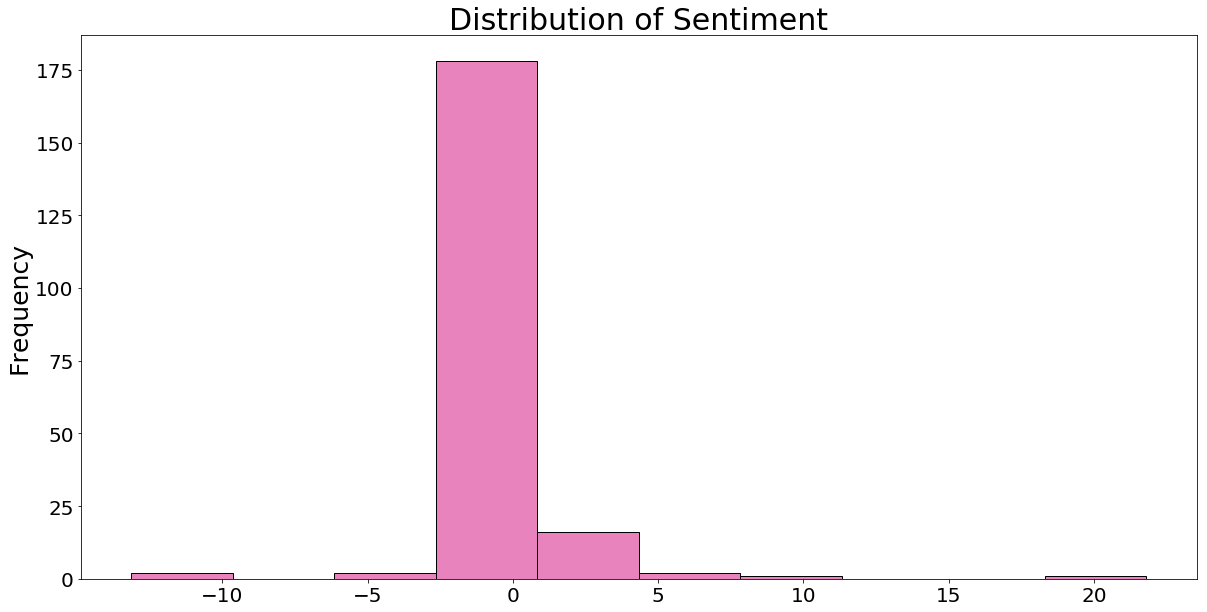

In [116]:
plt.figure(figsize = (20,10))
plt.hist(df_daily_key_word['interaction_score_compound'].pct_change(1), color = '#E983BD', ec = 'k')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Frequency', fontsize = 25)
plt.title('Distribution of Sentiment', fontsize = 30)

Just wanted to examine the distribution of sentiment when differenced by a percent change of 1 day. Most of the posts are going to sit between -5 and 5 when differenced by a percent change of 1 day. 

In [117]:
df_daily_key_word.columns

Index(['created_utc', 'score', 'compound', 'character_count', 'word_count',
       'interaction_score_compound', 'count_comments', 'patch_update', ' op',
       'nerf', 'perk', 'over', 'weak', 'too', 'hax', 'pass', 'rage', 'spray',
       'power', 'buff', 'o p', 'strong', 'snipe', 'impossible', 'hack', 'need',
       'quit', 'auto', 'noob', 'range', 'rate', 'fire', 'compound_sum',
       'unique_authors', 'interaction_sum', 'comment_count'],
      dtype='object')

In [118]:
df_daily_key_word.index

DatetimeIndex(['2018-10-11', '2018-10-12', '2018-10-13', '2018-10-14',
               '2018-10-15', '2018-10-16', '2018-10-17', '2018-10-18',
               '2018-10-19', '2018-10-20',
               ...
               '2019-04-22', '2019-04-23', '2019-04-24', '2019-04-25',
               '2019-04-26', '2019-04-27', '2019-04-28', '2019-04-29',
               '2019-04-30', '2019-05-01'],
              dtype='datetime64[ns]', name='date', length=203, freq=None)

In [119]:
df_daily_key_word['patch_update'].tail()

date
2019-04-27       0.0
2019-04-28       0.0
2019-04-29       0.0
2019-04-30    4146.0
2019-05-01       0.0
Name: patch_update, dtype: float64

Assigning all patch days greater than 0 to one for binary classification. 

In [120]:
df_daily_key_word['patch_update'][df_daily_key_word['patch_update'] > 0] = 1

/Users/adamburpee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [121]:
df_daily_key_word.to_csv('../data/df_daily.csv')

My classes are very unbalanced, but I expected this, as there are significantly more non-patch days than days with patches or updates

In [122]:
df_daily_key_word['patch_update'].value_counts(normalize = True)

0.0    0.91133
1.0    0.08867
Name: patch_update, dtype: float64

In [123]:
df_op.shape

(481135, 13)

In [124]:
df_daily_key_word.columns

Index(['created_utc', 'score', 'compound', 'character_count', 'word_count',
       'interaction_score_compound', 'count_comments', 'patch_update', ' op',
       'nerf', 'perk', 'over', 'weak', 'too', 'hax', 'pass', 'rage', 'spray',
       'power', 'buff', 'o p', 'strong', 'snipe', 'impossible', 'hack', 'need',
       'quit', 'auto', 'noob', 'range', 'rate', 'fire', 'compound_sum',
       'unique_authors', 'interaction_sum', 'comment_count'],
      dtype='object')

/Users/adamburpee/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


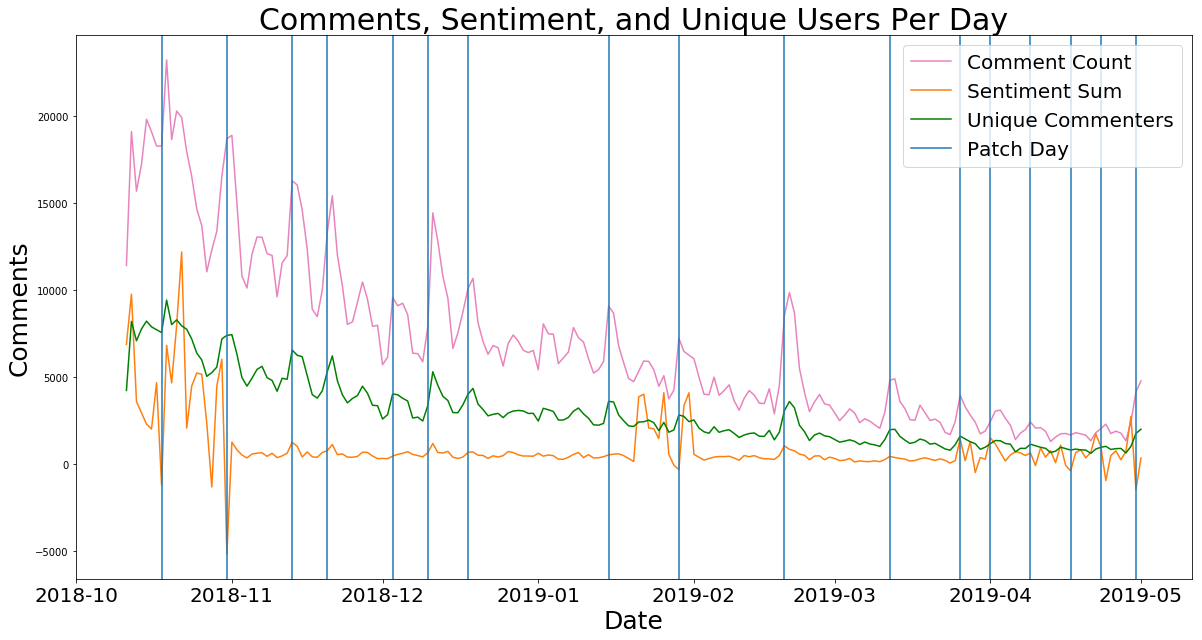

In [125]:
plt.figure(figsize = (20,10))
plt.title('Comments, Sentiment, and Unique Users Per Day', fontsize = (30))
plt.ylabel('Comments', fontsize = 25)
plt.xlabel('Date', fontsize = 25)
plt.plot(df_daily_key_word['comment_count'],  color = '#E983BD')
plt.plot(df_daily_key_word['interaction_sum'], c = 'C1')
plt.plot(df_daily_key_word['unique_authors'], c ='green')
plt.axvline(dt.datetime(2018, 10, 18), c = 'C0')
plt.axvline(dt.datetime(2018, 10, 31), c = 'C0')
plt.axvline(dt.datetime(2018, 11, 13), c = 'C0')
plt.axvline(dt.datetime(2018, 11, 20), c = 'C0')
plt.axvline(dt.datetime(2018, 12,  3), c = 'C0')
plt.axvline(dt.datetime(2018, 12, 10), c = 'C0')
plt.axvline(dt.datetime(2018, 12, 18), c = 'C0')
plt.axvline(dt.datetime(2019, 1,  15), c = 'C0')
plt.axvline(dt.datetime(2019, 1,  29), c = 'C0')
plt.axvline(dt.datetime(2019, 2,  19), c = 'C0')
plt.axvline(dt.datetime(2019, 3,  12), c = 'C0')
plt.axvline(dt.datetime(2019, 3,  26), c = 'C0')
plt.axvline(dt.datetime(2019, 4,   1), c = 'C0')
plt.axvline(dt.datetime(2019, 4,   9), c = 'C0')
plt.axvline(dt.datetime(2019, 4,  17), c = 'C0')
plt.axvline(dt.datetime(2019, 4,  23), c = 'C0')
plt.axvline(dt.datetime(2019, 4,  30), c = 'C0')
plt.xticks(fontsize = 20)
plt.legend(['Comment Count', 'Sentiment Sum', 'Unique Commenters', 'Patch Day'], fontsize = 20, loc = 'upper right');
plt.savefig('../plots/comments_sentiment_unique_users')

The above graph shows the comment count, unique commenter count, and the sum of sentiments each day, along with verticle lines at every patch date. Up until the last month, every patch corresponds with a spike in comment count and unique commenters. The sentiment isn't as consistent in terms of the trend. There are dips during the first couple patches, and then a pretty constant sentiment sitting pretty close to zero until halfway through january, where there is a jump in sentiment, followed by a consequent dip at the same time as another patch. Towards the end, the relationships between patches and the spikes and dips are harder to read. It does seem like there is a dip just before or just after each patch, suggesting that while patches do stimulate feedback, they don't necessarily illicit positive reactions. The anticipation for patches may elicit positive feedback, but ultimately the user base's overall feedback is about the same in terms of sentiment.

I am going to graph the same graph as above but with the overpowered dataframe to see how things change when only including comments that directly relate to weapons being overpowered or underpowered. 

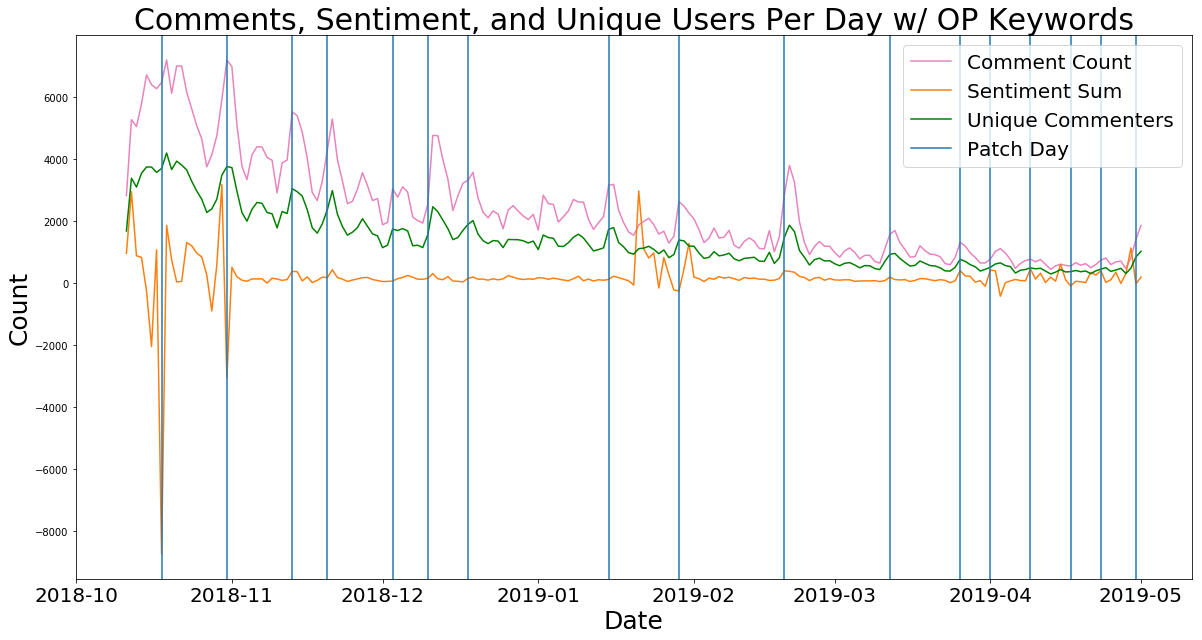

In [126]:
plt.figure(figsize = (20,10))
plt.title('Comments, Sentiment, and Unique Users Per Day w/ OP Keywords', fontsize = (30))
plt.ylabel('Count', fontsize = 25)
plt.xlabel('Date', fontsize = 25)
plt.plot(df_op.groupby(['date', 'count_comments']).size().unstack('count_comments')[1],  color = '#E983BD')
plt.plot(df_op.groupby('date')['interaction_score_compound'].sum(), c = 'C1')
plt.plot(df_op.groupby('date')['author'].nunique(), c ='green')
plt.axvline(dt.datetime(2018, 10, 18), c = 'C0')
plt.axvline(dt.datetime(2018, 10, 31), c = 'C0')
plt.axvline(dt.datetime(2018, 11, 13), c = 'C0')
plt.axvline(dt.datetime(2018, 11, 20), c = 'C0')
plt.axvline(dt.datetime(2018, 12,  3), c = 'C0')
plt.axvline(dt.datetime(2018, 12, 10), c = 'C0')
plt.axvline(dt.datetime(2018, 12, 18), c = 'C0')
plt.axvline(dt.datetime(2019, 1,  15), c = 'C0')
plt.axvline(dt.datetime(2019, 1,  29), c = 'C0')
plt.axvline(dt.datetime(2019, 2,  19), c = 'C0')
plt.axvline(dt.datetime(2019, 3,  12), c = 'C0')
plt.axvline(dt.datetime(2019, 3,  26), c = 'C0')
plt.axvline(dt.datetime(2019, 4,   1), c = 'C0')
plt.axvline(dt.datetime(2019, 4,   9), c = 'C0')
plt.axvline(dt.datetime(2019, 4,  17), c = 'C0')
plt.axvline(dt.datetime(2019, 4,  23), c = 'C0')
plt.axvline(dt.datetime(2019, 4,  30), c = 'C0')
plt.xticks(fontsize = 20)
plt.legend(['Comment Count', 'Sentiment Sum', 'Unique Commenters', 'Patch Day'], fontsize = 20, loc = 'upper right');

This graph is almost identical to the graph above. A few things to note though, which may seem obvious, is that the magnitude of the unique commenters and number of comments is significantly less. However, the magnitude of the sentiment is more intense in certain areas and about the same in the rest of the months. In October, the magnitude of sentiment is almost double what it was in the original dataset. Some of the keywords I used in the new dataframe are specifically regarding weapons that needed an almost immediate nerf after the first week or two of being released to the public. While testers do test the game for bugs and strength testing etc, there are so many people playing the game at release that people get even more creative than testers and break the game in new ways. As someone who was playing the game at that time, there were certain weapons that were being used in ways that they were not intended for, and gave players significant advantages or disadvantages if used in these new ways. 

In [127]:
df_daily_key_word.columns

Index(['created_utc', 'score', 'compound', 'character_count', 'word_count',
       'interaction_score_compound', 'count_comments', 'patch_update', ' op',
       'nerf', 'perk', 'over', 'weak', 'too', 'hax', 'pass', 'rage', 'spray',
       'power', 'buff', 'o p', 'strong', 'snipe', 'impossible', 'hack', 'need',
       'quit', 'auto', 'noob', 'range', 'rate', 'fire', 'compound_sum',
       'unique_authors', 'interaction_sum', 'comment_count'],
      dtype='object')

In [128]:
op_list

[' op',
 'nerf',
 'perk',
 'over',
 'weak',
 'too',
 'hax',
 'pass',
 'rage',
 'spray',
 'power',
 'buff',
 'o p',
 'strong',
 'snipe',
 'impossible',
 'hack',
 'need',
 'quit',
 'auto',
 'noob',
 'range',
 'rate',
 'fire']

In [129]:
df_op.columns

Index(['author', 'body', 'created_utc', 'score', 'permalink', 'date',
       'compound', 'title', 'character_count', 'word_count',
       'interaction_score_compound', 'count_comments', 'patch_update'],
      dtype='object')

Examining the average sentiment score of the rows containing each word in my OP list. 

In [130]:
op_sent_list = []
for i in op_list:
    op_sent_list.append(df_op[df_op['body'].str.contains(i)]['interaction_score_compound'].mean())
    print(f'{i} has a sentiment score of:', df_op[df_op['body'].str.contains(i)]['interaction_score_compound'].mean())

 op has a sentiment score of: 0.10035714569826061
nerf has a sentiment score of: -0.2099780738980362
perk has a sentiment score of: -0.10601594879518055
over has a sentiment score of: -0.11654620853080637
weak has a sentiment score of: -0.25548616783425226
too has a sentiment score of: -0.013299088115393747
hax has a sentiment score of: -1.1065271186440675
pass has a sentiment score of: 0.12849471676351712
rage has a sentiment score of: -0.11140036867617968
spray has a sentiment score of: -0.4229179332042591
power has a sentiment score of: 0.022440644919385133
buff has a sentiment score of: -0.0414540904816635
o p has a sentiment score of: 0.2115536270936832
strong has a sentiment score of: 0.5323830098378116
snipe has a sentiment score of: -0.10471971409325694
impossible has a sentiment score of: -0.0023591532732261315
hack has a sentiment score of: -0.22211637895602201
need has a sentiment score of: 0.0695614858413246
quit has a sentiment score of: 0.089791194376451
auto has a sentim

In [131]:
df_op[df_op['body'].str.contains(' op')]['interaction_score_compound'].mean()

0.10035714569826061

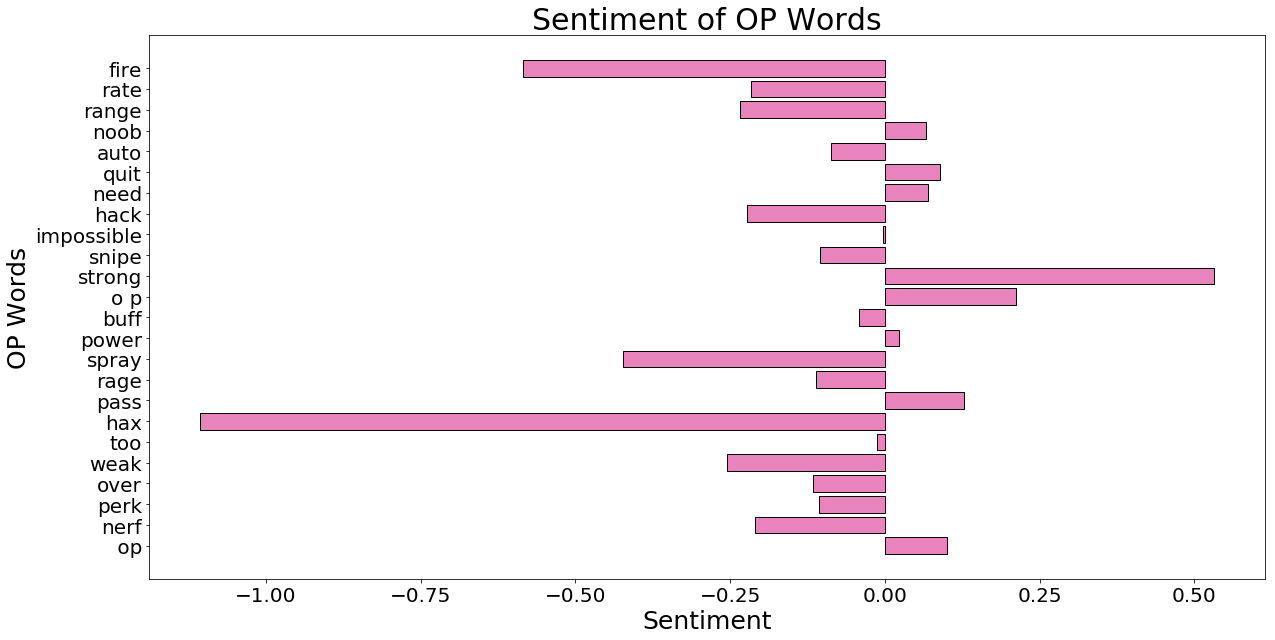

In [132]:
plt.figure(figsize = (20,10))
plt.title('Sentiment of OP Words', fontsize = 30)
plt.xticks(fontsize = 20)
plt.xlabel('Sentiment', fontsize = 25)
plt.ylabel('OP Words', fontsize = 25)
plt.yticks(fontsize = 20)
plt.barh(y = op_list, width = op_sent_list, color = '#E983BD', ec = 'k')
plt.savefig('../plots/op_word_sentiment')

The above graph shows the average sentiment of comments that include each of the words I chose to use in my 'OP' list. As we can see, many of them elicited negative sentiments, as expected. Some of them leaned more positive, which also makes sense, considering a word like strong is difficult to turn negative unless adding a quantifier that expresses it is excessive strength. Surprisingly to me 'op' has a very mildly positive sentiment, but I think that may be partly due to the fact that it can be picking up words that contain 'op' in them, like open or operation. 

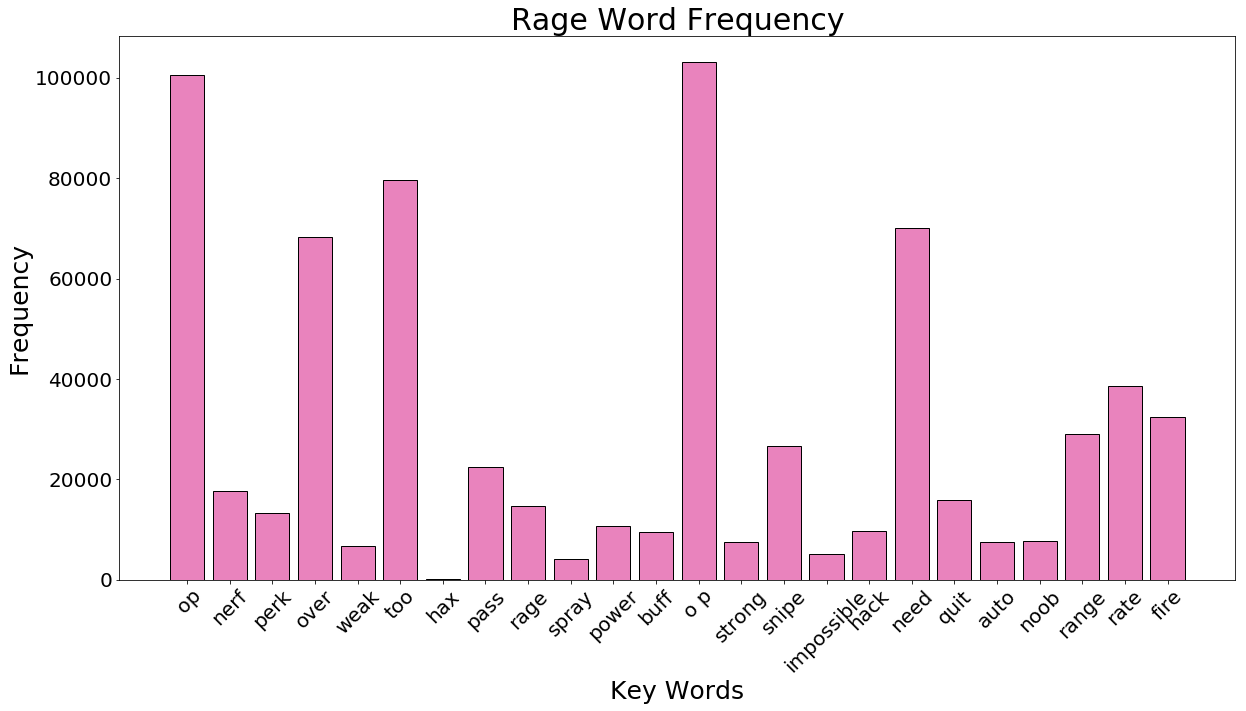

In [133]:
plt.figure(figsize = (20,10))
plt.bar(x = op_list, height = df_daily_key_word[op_list].sum(), color = '#E983BD', ec = 'k')
plt.title('Rage Word Frequency', fontsize = 30)
plt.yticks(fontsize = 20)
plt.ylabel('Frequency', fontsize = 25)
plt.xlabel('Key Words', fontsize = 25)
plt.xticks(rotation = 45, fontsize = 20);

Above is the frequency of those 'op' words that I vectorized. As we can see, op was the most common, but also held such little positive sentiment. over(for overpower), too, and need were all the most frequently used words that I picked. While standing alone, these words don't imply a lot about the game, but knowing how people use them in regards to the game helps give inference as to why they are saying what they are saying. People talk about weapons being too powerful or too op or too strong or too weak. Quantifying any metric by saying it is 'too' much gives insight into where improvements need to be made in the game. Hax has an extremely negative sentiment, but is used very infrequently. 

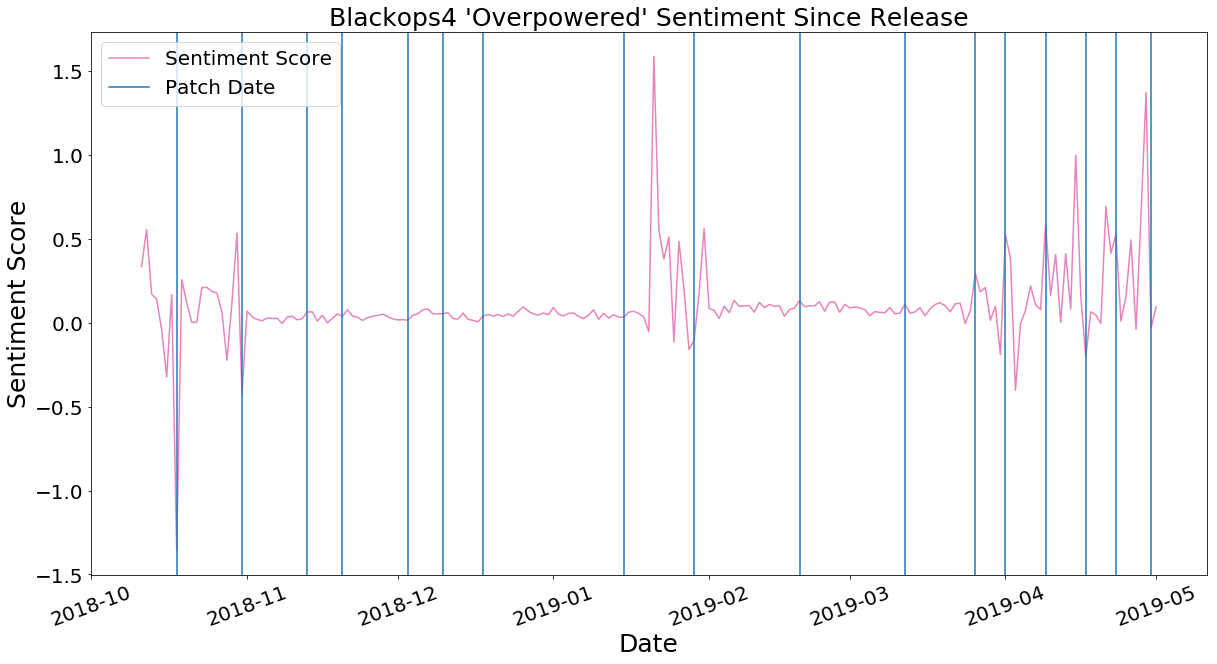

In [134]:
plt.figure(figsize = (20,10))
plt.title("Blackops4 'Overpowered' Sentiment Since Release", size = 25)
plt.plot(df_op.groupby(df_op.date)['interaction_score_compound'].mean(), c = '#E983BD')
plt.axvline(dt.datetime(2018, 10, 18), c = 'C0')
plt.axvline(dt.datetime(2018, 10, 31), c = 'C0')
plt.axvline(dt.datetime(2018, 11, 13), c = 'C0')
plt.axvline(dt.datetime(2018, 11, 20), c = 'C0')
plt.axvline(dt.datetime(2018, 12,  3), c = 'C0')
plt.axvline(dt.datetime(2018, 12, 10), c = 'C0')
plt.axvline(dt.datetime(2018, 12, 18), c = 'C0')
plt.axvline(dt.datetime(2019, 1,  15), c = 'C0')
plt.axvline(dt.datetime(2019, 1,  29), c = 'C0')
plt.axvline(dt.datetime(2019, 2,  19), c = 'C0')
plt.axvline(dt.datetime(2019, 3,  12), c = 'C0')
plt.axvline(dt.datetime(2019, 3,  26), c = 'C0')
plt.axvline(dt.datetime(2019, 4,   1), c = 'C0')
plt.axvline(dt.datetime(2019, 4,   9), c = 'C0')
plt.axvline(dt.datetime(2019, 4,  17), c = 'C0')
plt.axvline(dt.datetime(2019, 4,  23), c = 'C0')
plt.axvline(dt.datetime(2019, 4,  30), c = 'C0')
plt.ylabel('Sentiment Score', fontsize = 25)
plt.yticks(fontsize = 20)
plt.xlabel('Date', fontsize = 25)
plt.xticks(fontsize = 20, rotation = 20)
plt.legend(['Sentiment Score', 'Patch Date'], fontsize = 20, loc = 'upper left')

This graph shows the daily sentiment scores in the Overpowered dataset. I wanted to see if the trends in this dataset were different than in the original dataset. We can see that from when the game came out until november, there were significant dips in sentiment until the patches were released, at which point the sentiment scores jump a bit. From november until mid january, the sentiment about the game said pretty consistently around zero, until the patch came out mid january, when sentiment spiked. It dipped again leading up to the patch, and then spiked again momentarily. Beginning at the end of march, patches started being released more frequently and the sentiment scores are harder to read in relation to the patches. There are almost daily spikes and dips, regardless of the patch releases. For the most part, the patches were either released on dips, and led to increases in sentiment, or they were released on spikes, and led to dips in sentiment. I think this could be due to the fact that sometimes patches are announced beforehand, which can lead to excitement, but when the patch is released, it is underwhelming, and the user base gets upset. 

In [135]:
df_daily_key_word.interaction_score_compound.max()

1.1295446685878976

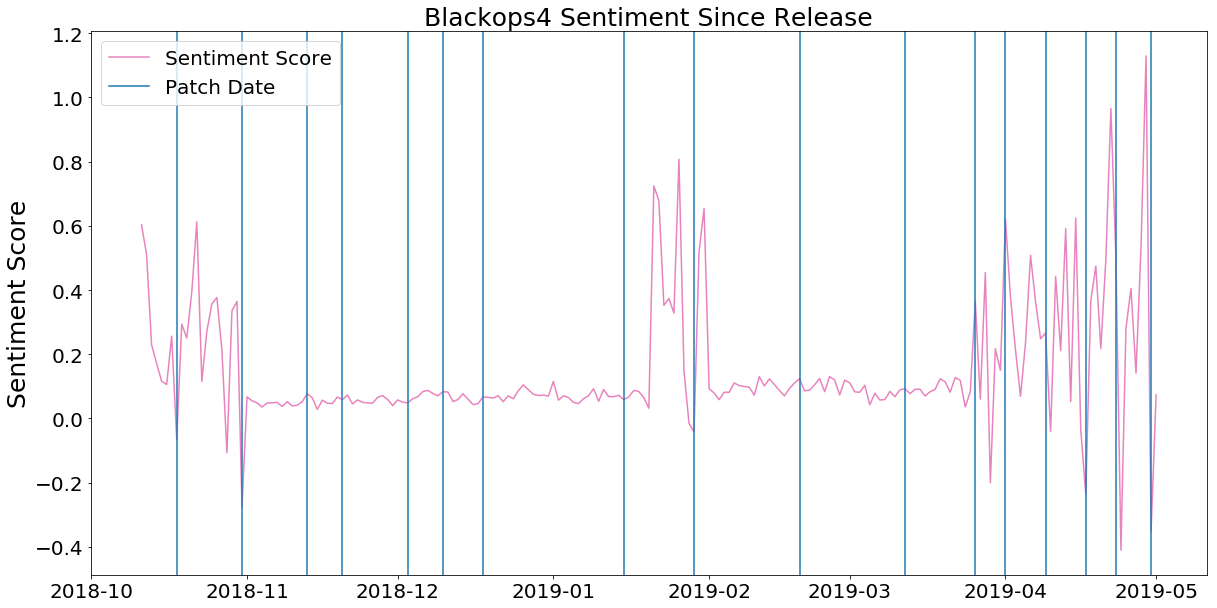

In [136]:
plt.figure(figsize = (20,10))
plt.title('Blackops4 Sentiment Since Release', size = 25)
plt.plot(df_daily_key_word['interaction_score_compound'], c = '#E983BD')
# plt.plot(df.groupby(df.date)['interaction_score_compound'].mean(), c = 'C0')
plt.axvline(dt.datetime(2018, 10, 18), c = 'C0')
plt.axvline(dt.datetime(2018, 10, 31), c = 'C0')
plt.axvline(dt.datetime(2018, 11, 13), c = 'C0')
plt.axvline(dt.datetime(2018, 11, 20), c = 'C0')
plt.axvline(dt.datetime(2018, 12,  3), c = 'C0')
plt.axvline(dt.datetime(2018, 12, 10), c = 'C0')
plt.axvline(dt.datetime(2018, 12, 18), c = 'C0')
plt.axvline(dt.datetime(2019, 1,  15), c = 'C0')
plt.axvline(dt.datetime(2019, 1,  29), c = 'C0')
plt.axvline(dt.datetime(2019, 2,  19), c = 'C0')
plt.axvline(dt.datetime(2019, 3,  12), c = 'C0')
plt.axvline(dt.datetime(2019, 3,  26), c = 'C0')
plt.axvline(dt.datetime(2019, 4,   1), c = 'C0')
plt.axvline(dt.datetime(2019, 4,   9), c = 'C0')
plt.axvline(dt.datetime(2019, 4,  17), c = 'C0')
plt.axvline(dt.datetime(2019, 4,  23), c = 'C0')
plt.axvline(dt.datetime(2019, 4,  30), c = 'C0')
plt.ylabel('Sentiment Score', fontsize = 25)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(['Sentiment Score', 'Patch Date'], fontsize = 20, loc = 'upper left')
plt.savefig('../plots/sentiment_and_patches')

The sentiment in the original dataset mimics the patterns in the dataset that only includes words associated with strong feelings surrounding the game, however, the spikes and dips are more significant. More recently, the magnitude of the spikes and dips are more intense, with more polar opposite reactions. This suggests that people are really passionate about things other than what I included in my 'overpowered' list. 

In [137]:
#df_op.set_index('date', inplace = True)

Creating a dictionary so that I can plot out how many times my op_list words are mentioned in between each patch.

In [138]:
op_dict = {}

Creating a function that takes the start date and end date to each patch and the dictionary and uses the patch date as the key and number of op_list mentions as the value. 

In [139]:
def op_dict_func(start, end, dict_op_words):
    count = 0
    for i in op_list:
        count += df_daily_key_word.loc[start: end][i].sum()
    op_dict[end] = count
    return dict_op_words
        #print(f'{i} occurred', df_daily_key_word.loc['2018-10-11': '2018-10-18'][i].sum(), 'times')

In [140]:
patch_date_list = ['2018-10-11',
                   '2018-10-18',
                   '2018-10-31',
                   '2018-11-13',
                   '2018-11-20',
                   '2018-12-03',
                   '2018-12-10',
                   '2018-12-18',
                   '2019-01-15',
                   '2019-01-29',
                   '2019-02-19',
                   '2019-03-12',
                   '2019-03-26',
                   '2019-04-01',
                   '2019-04-09',
                   '2019-04-17',
                   '2019-04-23',
                   '2019-04-30']

Simple for loop to run my op_dict_func with each date. 

In [141]:
for d in range(len(patch_date_list)):
    try:
        op_dict_func(patch_date_list[d], patch_date_list[d+1], op_dict)
    except:
        pass

In [142]:
op_dict

{'2018-10-18': 63421.0,
 '2018-10-31': 119323.0,
 '2018-11-13': 93594.0,
 '2018-11-20': 47349.0,
 '2018-12-03': 62896.0,
 '2018-12-10': 29296.0,
 '2018-12-18': 45618.0,
 '2019-01-15': 98816.0,
 '2019-01-29': 44433.0,
 '2019-02-19': 53236.0,
 '2019-03-12': 44355.0,
 '2019-03-26': 22393.0,
 '2019-04-01': 9351.0,
 '2019-04-09': 10338.0,
 '2019-04-17': 7822.0,
 '2019-04-23': 6069.0,
 '2019-04-30': 9024.0}

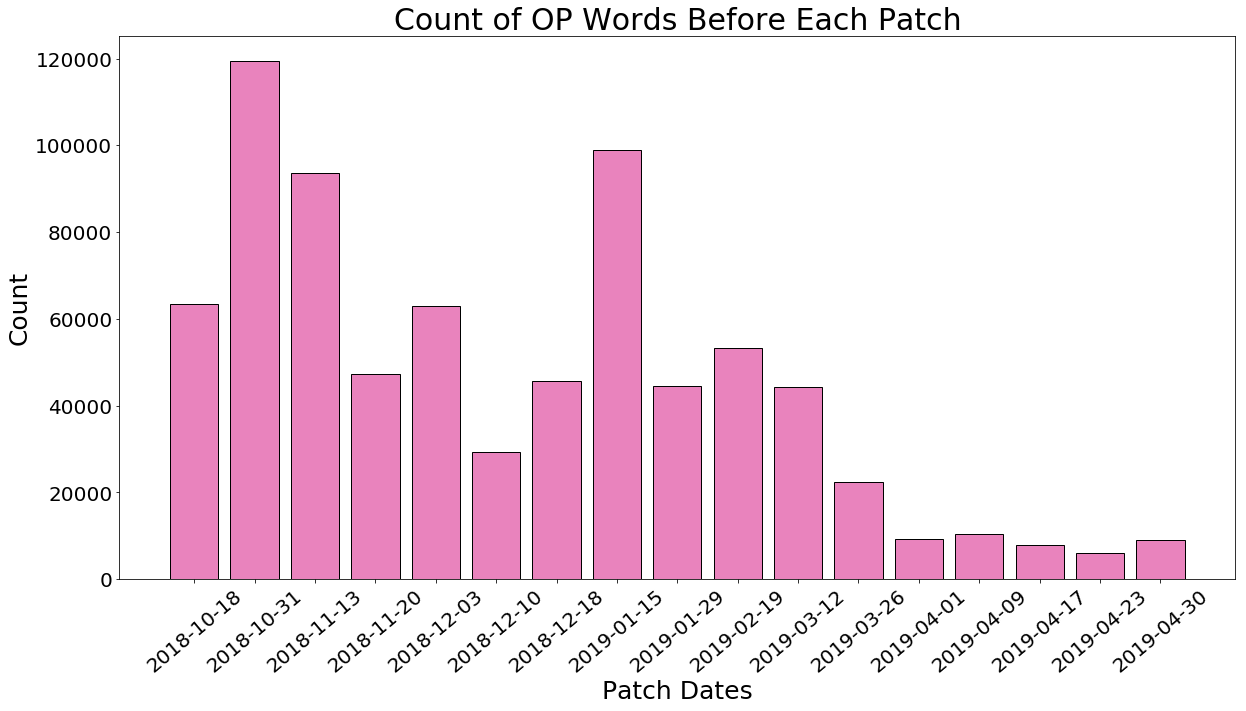

In [143]:
plt.figure(figsize = (20,10))
plt.bar(range(len(op_dict)), list(op_dict.values()), align = 'center', color = '#E983BD', ec = 'k')
plt.xticks(range(len(op_dict)), list(op_dict.keys()))
plt.xticks(fontsize = 20, rotation = 40)
plt.yticks(fontsize = 20)
plt.ylabel('Count', fontsize = 25)
plt.xlabel('Patch Dates', fontsize = 25)
plt.title('Count of OP Words Before Each Patch', fontsize = 30);
plt.savefig('../plots/op_words_between_patches')

Looking at the distribution of the OP words between patches, we can see that there is the most usage in the first month, with a spike in the middle of january. Looking closely, though, we can see the spike in the middle is due to a 1 month gap in patch releases, so the comments amassed. Beginning at the end of March, the usage of each word dips quite a bit, and I think this is due to three things: 

1. Most of the weapons and items were balanced
2. A significant number of players stopped playing
3. Patch frequency increased by 2

In [144]:
df_op.to_csv('../data/df_op.csv')

In [145]:
#df['date'] = pd.to_datetime(df['date'])

Importing Count Vectorizer and train test split to run some more EDA on specific words. 

In [146]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

Examining a few different words and how the average comment with that word scores with VADER. 

In [147]:
df[df.body.str.contains('grenade')].groupby('date')['interaction_score_compound'].mean()

date
2018-10-11   -11.242033
2018-10-12     0.902122
2018-10-13    -2.122736
2018-10-14    -0.323651
2018-10-15     0.508720
2018-10-16    -0.054745
2018-10-17    -0.716816
2018-10-18    -0.591026
2018-10-19    -0.845060
2018-10-20    -0.615042
2018-10-21    -0.546379
2018-10-22    -1.882682
2018-10-23    -1.758444
2018-10-24    -5.466271
2018-10-25    -0.141194
2018-10-26    -3.601469
2018-10-27     0.616658
2018-10-28    -0.805824
2018-10-29    -0.251103
2018-10-30     0.233250
2018-10-31    -0.091084
2018-11-01    -0.169069
2018-11-02    -0.288190
2018-11-03    -0.262115
2018-11-04    -0.244554
2018-11-05    -0.127948
2018-11-06    -0.073559
2018-11-07    -0.133607
2018-11-08    -0.256311
2018-11-09     0.130259
                ...    
2019-04-02    -1.083050
2019-04-03     0.928558
2019-04-04    -1.574157
2019-04-05     0.604000
2019-04-06    -1.596033
2019-04-07    -1.449200
2019-04-08    -0.422860
2019-04-09     2.850915
2019-04-10    -1.308580
2019-04-11     1.132000
2019-04-12 

In [148]:
df[df.body.str.contains('dead silence')].groupby('date')['interaction_score_compound'].mean()

date
2018-10-11    -1.155885
2018-10-12    -0.553220
2018-10-13     0.064452
2018-10-14    -0.591720
2018-10-15    -1.574900
2018-10-16    -4.113166
2018-10-17    -0.904085
2018-10-18    -0.878377
2018-10-19    -0.912394
2018-10-20    -1.497526
2018-10-21    -2.972178
2018-10-22    -1.848672
2018-10-23     0.656428
2018-10-24    -0.784469
2018-10-25    -1.323675
2018-10-26    -2.176803
2018-10-27    -0.698396
2018-10-28    -2.167305
2018-10-29    -1.482211
2018-10-30    -2.552874
2018-10-31    -0.988607
2018-11-01    -0.457596
2018-11-02    -0.449720
2018-11-03    -0.265676
2018-11-04    -0.390016
2018-11-05    -0.497669
2018-11-06    -0.420881
2018-11-07    -0.326783
2018-11-08    -0.406842
2018-11-09    -0.293947
                ...    
2019-04-02    -1.427933
2019-04-03    -4.188200
2019-04-04    -1.002533
2019-04-05    -0.814333
2019-04-06    -0.801092
2019-04-07    -0.735333
2019-04-08    -0.542150
2019-04-09    -0.475700
2019-04-10     1.101300
2019-04-11     0.070150
2019-04-12 

Going to run a countvectorizer to see if my list of words correspond with any of the top words of the vectorizer. 

Adding a body column to my df daily keyword dataframe that aggregates all comments on that date. 

In [149]:
df_daily_key_word['body'] = df.groupby('date')[['body']].agg(lambda x: ''.join(x))

Instantiating my countvectorizer with 2000 features to avoid nonsense words and typos. 

In [150]:
cvec = CountVectorizer(ngram_range = (2,2), stop_words = 'english', max_features = 2000)

In [151]:
X = df_daily_key_word['body']

In [152]:
cvec.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=2000, min_df=1,
        ngram_range=(2, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [153]:
X_cvec = cvec.transform(X)

In [154]:
len(cvec.get_feature_names())

2000

In [155]:
# from autocorrect import spell

In [156]:
X_cvec

<203x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 341065 stored elements in Compressed Sparse Row format>

In [157]:
most_common_words_df_daily = pd.DataFrame(X_cvec.toarray(), 
                                 columns = cvec.get_feature_names()).sum().sort_values(ascending = False)

In [158]:
most_common_words_df_daily_df = pd.DataFrame(X_cvec.toarray(),
                                             columns = cvec.get_feature_names())

In [159]:
most_common_words_df_daily_df.to_csv('../data/most_common_words_cvec.csv')

In [160]:
most_common_words_df_daily[50:65].index

Index(['like game', 've got', 'look like', 'player base', 'strike team',
       'enemy team', 'haven played', 'battle royale', 'good game',
       'operator mod', 'don really', 'shot kill', 'like just', 'game don',
       'like said'],
      dtype='object')

Plotting out the top 15 bi grams. 

(array([    0.,  5000., 10000., 15000., 20000., 25000.]),
 <a list of 6 Text yticklabel objects>)

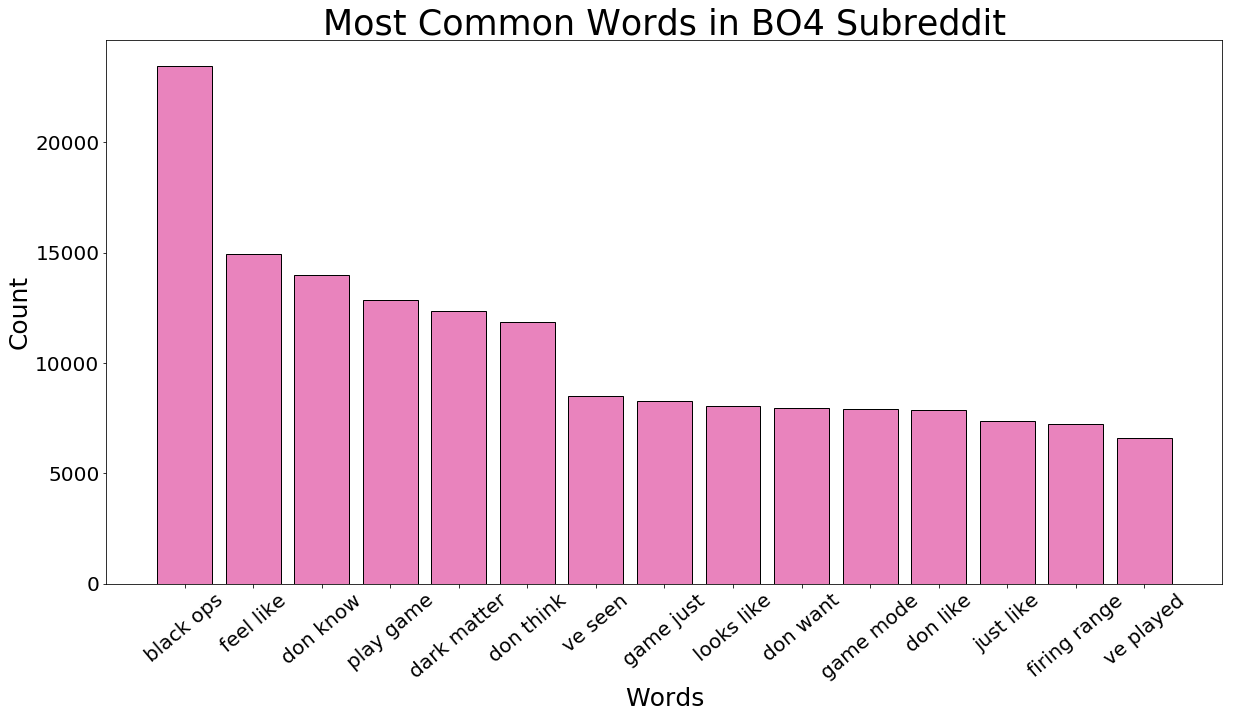

In [161]:
plt.figure(figsize = (20,10))
plt.bar(most_common_words_df_daily[0:15].index, height = most_common_words_df_daily[0:15], color = '#E983BD', ec = 'k')
plt.title('Most Common Words in BO4 Subreddit', fontsize = 35)
plt.ylabel('Count', fontsize = 25)
plt.xlabel('Words', fontsize = 25)
plt.xticks(fontsize = 20, rotation = 40)
plt.yticks(fontsize = 20)

Obviously these look different from the words as I chose, but these are clearly the most common bi grams used in the subreddit. Just from a cursory view, I imagine that 'feel like', 'don know', 'don think', 'game just', 'don want', and 'don like' would incite negative sentiment by knowing how people talk about the game. We will take a look below without any context. 

In [162]:
for i in most_common_words_df_daily[0:15].index:
    print(f'{i} has a sentiment score of: ', sentiment_analyzer_scores(i)['compound'])

black ops has a sentiment score of:  0.0
feel like has a sentiment score of:  0.3612
don know has a sentiment score of:  0.0
play game has a sentiment score of:  0.34
dark matter has a sentiment score of:  0.0258
don think has a sentiment score of:  0.0
ve seen has a sentiment score of:  0.0
game just has a sentiment score of:  0.0
looks like has a sentiment score of:  0.3612
don want has a sentiment score of:  0.0772
game mode has a sentiment score of:  0.0
don like has a sentiment score of:  0.3612
just like has a sentiment score of:  0.3612
firing range has a sentiment score of:  -0.34
ve played has a sentiment score of:  0.34


My $guesses$ were incorrect insofar as analyzing them individually goes. However, I think taking them into context may add or detract some sentiment from them. It makes sense that the words I picked weren't in the top words used on the subreddit. I picked niche words that would only come up in specifically themed conversations, not general conversations about the game in general. 

# Conclusion and Next Steps

I've gathered a lot of information in this notebook and am interested to see what insights I gain by modelling. By creating an interaction term between my sentiment score and the reddit score, I was able to magnify the overall sentiment based on how other users responded to certain comments. This also resulted in a column that wasn't just a column of values between negative one and one, so I was able to compare trends in sentiment with unique users and unique comments, and how each of those relate to patch updates. When looking at the days patches were released, there was a pretty common trend, outside of a few months where sentiment sat right around zero during the holidays. There are spikes in unique users and unique comments when patches are released, and for the most part, there are either sentiment spikes OR dips when patches come out, meaning that people are either very happy when the patch comes out, or very upset. 

There is something to note, as well. For the most part, regardless of whether the spike or dip in sentiment happened at the patch release, there is typically a downward trend in sentiment following the patch releases, which settles just above zero. This likely has to do with people feeling disillusioned about what they were getting with the patch. If they are told 'hey we are going to fix this in the patch and add this new thing' but the new thing is broken and the old thing isn't completely fixed, the overall sentiment on reddit will decrease. We can also see through the unique comments and unique users that as more patches come out and sentiment remains low, user activity dips quite drastically. Given, this is $just$ reddit participation, but it should give us some insight as to how to keep people engaged enough with the game itself to continue posting to other media about their time playing the game. 

In this notebook, I also examined a self made vectorizer, for which I selected the top 20 words for which I know are associated with negative sentiment regarding the game, and used those as features graph out and compare usage of in between patches. In addition to that, I countvectorized the corpus with 2000 features and examined the top words used on the subreddit. 

Next, I will be looking at arima models to see if I can predict sentiment, unique users, and unique comments, and I will be running a recurrent neural network to predict when patches will be released based on all of the features and interaction terms I currently have. I may compare my personally vectorized words with a PCA version of my countvectorized words. 